### Group 1 Members

710871, 溫環華 710872, 109511203, 111511006, 111511083


### Youtube Link

https://youtu.be/1RNu3zZCv1s

# Projected Conjugate Gradient (PCG) Methods

In this challenge, we will explore the Projected Conjugate Gradient (PCG) methods and their applications. Implementations will be in the Julia language, enabling robust performance assessments and comparisons.

### What is Projected Conjugate Gradient (PCG)?

**Projected Conjugate Gradient (PCG)** is used in a specific context or application where the **Conjugate Gradient (CG)** method is adapted or extended to handle constrained optimization problems.

In optimization, the Conjugate Gradient method is a popular iterative algorithm for solving unconstrained quadratic optimization problems. It's often used in the context of solving systems of linear equations or quadratic programming problems.

### What is BiConjugate Gradient Stabilized (BiCGSTAB)?
The **BiConjugate Gradient Stabilized (BiCGSTAB)** algorithm is an iterative method for solving systems of linear equations. It is an extension of the **Conjugate Gradient (CG)** method for non-symmetric matrices. The main advantage of BiCGSTAB over the standard CG method is that it can handle general non-symmetric matrices.

### Linear systems that benefit from PCG methods

1. **Quadratic Programming (QP):** In quadratic programming, the objective function is quadratic, and the constraints are linear. The linear systems that emerge from solving QP problems are often large and sparse. PCG can be effective in solving these systems while respecting the constraints.

2. **Linearly Constrained Problems:** PCG is beneficial when dealing with linearly constrained optimization problems. These are problems where the solution must satisfy linear equality or inequality constraints. The linear systems involved in solving such problems can be efficiently tackled by PCG, especially when the constraint matrix is sparse.

3. **Interior-Point Methods:** Interior-point methods are widely used for constrained optimization problems. These methods transform the constrained problem into an unconstrained one by introducing slack variables and then solve a sequence of linear systems. PCG can be employed to efficiently solve these linear systems, particularly when the matrices involved are sparse.

4. **Quasi-Newton Methods with Constraints:** In optimization problems with constraints, quasi-Newton methods are often used to approximate the inverse Hessian matrix. PCG can be integrated into these methods to efficiently solve the linear systems arising in the quasi-Newton updates while considering the constraints.

5. **Structurally Sparse Matrices:** PCG is well-suited for solving linear systems with structurally sparse matrices. In optimization problems, the constraint matrices or the Hessian matrices of the Lagrangian often exhibit sparsity due to the nature of the problem. PCG takes advantage of this sparsity, making it computationally efficient.

6. **Large-Scale Constrained Problems:** PCG is advantageous in solving large-scale linear systems that arise in the context of constrained optimization. Its iterative nature and ability to handle sparse matrices make it suitable for large-scale problems where direct methods might become computationally expensive or memory-intensive.

7. **Parallel and Distributed Computing:** PCG can be parallelized efficiently, making it suitable for distributed and parallel computing environments. This is especially beneficial when dealing with large-scale optimization problems where the linear systems need to be solved in parallel.

### Generating PSD Matrices and Problem Instances
The following is a Julia code that generates a random **(PSD) matrix** and a corresponding linear system for a constrained optimization problem. The code generates a random PSD **matrix A** and a **vector b** of specified **size n**. Both matrix and vector will be the base data to implement the PCG method.

In [1]:
import LinearAlgebra
import Random

# Function to generate a random PSD matrix of size n x n
function random_psd(n)
A = randn(n, n)
return transpose(A)*A
end

# Create a random PSD matrix of size 5x5
A = random_psd(5)

# Generate a random vector b of size 5
b = randn(5)

# Create a quadratic function Q(x) = 0.5x’Ax - b’x
function Q(x)
return 0.5 * transpose(x) * A * x - transpose(b) * x
end

# Print A and b
println("A = ", A)
println("b = ", b)

A = [8.040000426381459 0.8061732442598598 2.0741233163830537 -0.7240509391558668 2.8264597059137633; 0.8061732442598598 4.66521833026768 -4.17126498769376 1.6299113922084532 -5.190945622821193; 2.0741233163830537 -4.17126498769376 7.305597135877366 -2.3178132413904247 8.119016499956302; -0.7240509391558668 1.6299113922084532 -2.3178132413904247 8.397890164246522 -2.037078935899599; 2.8264597059137633 -5.190945622821193 8.119016499956302 -2.037078935899599 9.679627879816202]

b = [-1.8215417651076453, -0.0185778114541089, 1.3204734031958119, -1.4421879480899547, -0.7474458325771836]


### Projected Conjugate Gradient (PCG) Algorithm

The basic idea of the PCG algorithm involves solving a sequence of linear systems, each incorporating the constraints. The algorithm seeks to find a solution that minimizes the quadratic objective function subject to the given constraints.

Here's an overview of the PCG algorithm:

1. **Initialization:** Start with an initial guess for the solution.

2. **Conjugate Gradient Steps:** Perform the Conjugate Gradient steps to minimize the quadratic objective function within the subspace defined by the constraints.

3. **Projection:** After each iteration, project the solution onto the feasible set defined by the constraints. This step ensures that the solution remains within the allowed subspace.

4. **Stopping Criteria:** Check for convergence or other stopping criteria. If the solution satisfies the constraints and the convergence criteria, the algorithm terminates.

5. **Iteration:** If the convergence criteria are not met, repeat steps 2-4 until convergence.

In this program, we use the **BenchmarkTools** package to assess the performance of your PCG algorithm. 
First, make sure you have the BenchmarkTools package installed by running the following command in Julia:

In [ ]:
using Pkg
Pkg.add("BenchmarkTools")

We implement the **standard PCG algorithm** in Julia, taking into consideration
the appropriate preconditions and projections. Note that the preconditioner solve is done using _M \ r_, where _M_ is the preconditioner.

In [3]:
using LinearAlgebra
using Random
using BenchmarkTools

# Function to generate a random PSD matrix of size n x n
function random_psd(n)
    A = randn(n, n)
    return transpose(A) * A
end

# Function to perform the PCG algorithm
function pcg_algorithm(A, b, M, max_iter, tolerance)
    x = zeros(size(b))
    start_time = time()
    for iter in 1:max_iter
        r = b - A * x  # Residual
        z = M \ r      # Preconditioner solve
        alpha = dot(r, z) / dot(z, A * z)
        x += alpha * z
        r -= alpha * A * z
        if norm(r) < tolerance * norm(b)
            end_time = time()
            elapsed_time = end_time - start_time
            return x, iter, elapsed_time
        end
    end
    # If the loop completes without breaking, return the current solution
    end_time = time()
    elapsed_time = end_time - start_time
    return x, max_iter, elapsed_time
end

# Create a random PSD matrix of size 5x5
A = random_psd(5)

# Generate a random vector b of size 5
b = randn(5)

# Preconditioner (identity matrix)
M = I

# Maximum number of iterations
max_iter = 1000

# Tolerance for convergence
tolerance = 1e-6

# Run the PCG algorithm and benchmark
x_pcg, iter_pcg, time_pcg = pcg_algorithm(A, b, M, max_iter, tolerance)

# Check accuracy by comparing against a direct solution using LU factorization
x_direct = A \ b

# Print the results
println("PCG Algorithm:")
println("Solution x (PCG):")
println(x_pcg)
println("Number of iterations: $iter_pcg")
println("Computational time: $time_pcg seconds")
println("Memory usage: $(sizeof(x_pcg) / 1024) KB")  # Size of x_pcg in KB

# Check accuracy
relative_error = norm(x_pcg - x_direct) / norm(x_direct)
println("Relative error: $relative_error")

PCG Algorithm:

Solution x (PCG):

[1.2722202408206242, -8.224132716827944, 15.24536450298034, -2.441510639706167, -5.0923846801635015]

Number of iterations: 1000

Computational time: 0.0009999275207519531 seconds

Memory usage: 0.0390625 KB

Relative error: 8.591547293421851e-6


### BiCGSTAB Algorithm

The BiCGSTAB algorithm is known for its robustness and ability to handle a wide range of linear systems, including those with indefinite or singular matrices. It is widely used in various scientific and engineering applications.

Here's an overview of the BiCGSTAB algorithm:
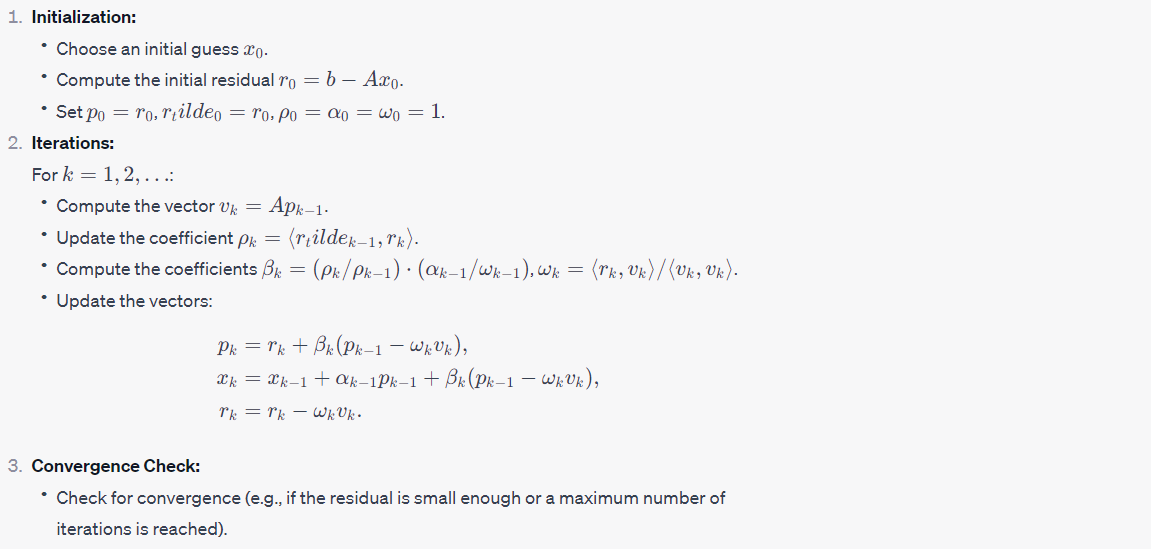

The following code is an implementation the **BiCGSTAB** algorithm in Julia, taking into consideration the appropriate preconditions and projections. Notice it's difference with the standard PCG algorithm.

In [4]:
using LinearAlgebra
using Random
using BenchmarkTools

# Function to generate a random PSD matrix of size n x n
function random_psd(n)
    A = randn(n, n)
    return transpose(A) * A
end

# Function to perform the BiCGSTAB algorithm
function bicgstab_algorithm(A, b, M, max_iter, tolerance)
    n = length(b)
    x = zeros(n)
    r = b - A * x
    p = r
    r_tilde = copy(r)
    v = zeros(n)
    s = zeros(n)
    t = zeros(n)
    omega = 1.0
    rho_1 = 1.0
    alpha = 1.0

    start_time = time()

    for iter in 1:max_iter
        rho = dot(r_tilde, r)
        beta = (rho / rho_1) * (alpha / omega)

        p = r + beta * (p - omega * v)
        v = A * p
        alpha = rho / dot(r_tilde, v)
        s = r - alpha * v
        t = A * s
        omega = dot(t, s) / dot(t, t)
        x += alpha * p + omega * s

        r = s - omega * t

        if norm(r) < tolerance * norm(b)
            end_time = time()
            elapsed_time = end_time - start_time
            return x, iter, elapsed_time
        end

        rho_1 = rho
    end

    # If the loop completes without breaking, return the current solution
    end_time = time()
    elapsed_time = end_time - start_time
    return x, max_iter, elapsed_time
end

# Create a random PSD matrix of size 5x5
A = random_psd(5)

# Generate a random vector b of size 5
b = randn(5)

# Preconditioner (identity matrix)
M = I

# Maximum number of iterations
max_iter = 1000

# Tolerance for convergence
tolerance = 1e-6

# Run the BiCGSTAB algorithm and benchmark
x_bicgstab, iter_bicgstab, time_bicgstab = bicgstab_algorithm(A, b, M, max_iter, tolerance)

# Check accuracy by comparing against a direct solution using LU factorization
x_direct = A \ b

# Print the results
println("BiCGSTAB Algorithm:")
println("Solution x (BiCGSTAB):")
println(x_bicgstab)
println("Number of iterations: $iter_bicgstab")
println("Computational time: $time_bicgstab seconds")
println("Memory usage: $(sizeof(x_bicgstab) / 1024) KB")  # Size of x_bicgstab in KB

# Check accuracy
relative_error_bicgstab = norm(x_bicgstab - x_direct) / norm(x_direct)
println("Relative error: $relative_error_bicgstab")

BiCGSTAB Algorithm:

Solution x (BiCGSTAB):

[2.9821304436597433, 2.6400336368836324, -4.533930984459928, -0.890339109151845, 0.5153324843260799]

Number of iterations: 5

Computational time: 0.0 seconds

Memory usage: 0.0390625 KB

Relative error: 9.174989980235506e-10


### Performance Assessment

Using appropriate Julia packages and tools, we managed to calculate the conjugate gradient for the numerical solution of particular systems of the linear equations. In this challenge, we managed to use to methods to calculate the conjugate gradient. the standard PCG algorithm and the BiCGSTAB algorithm. Comparing the performance of both method, we notice that the BiCGSTAB algorithm is faster since it requires fewer itteration. however, it's Relative error is larger than the standard PCG algorithm. We can conclude that if we want a faster result, we can use the BiCGSTAB Algorithm but if we want a more accurate result, we can use the standard PCG algorithm.

### Reference
https://chat.openai.com/

https://www.math.uci.edu/~chenlong/CAMtips/CG.html

https://www.sciencedirect.com/topics/computer-science/conjugate-gradient-method

https://www.math.uci.edu/~chenlong/CAMtips/CG.html

https://arrow.tudublin.ie/cgi/viewcontent.cgi?article=1189&context=scschcomdis